In [33]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [34]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

mpl.rcParams.update({'font.size': 22})

In [35]:
dirnames = glob('*/')
if 'tests/' in dirnames:
    dirnames.remove('tests/')
dirnames = sorted(dirnames, key=str.lower)
dirnames

['case_no_relaxation/', 'fewer_features/', 'much_fewer_features/', 'original/']

In [36]:
dfiter = []
dfall = pd.DataFrame()
for dirname in dirnames:
    dfiter.append(pd.read_csv(dirname + "non_linear_iterations.csv").iloc[:,:-1])
    dfiter[-1].columns = dfiter[-1].columns.str.strip()
    dfall = pd.concat([dfall, dfiter[-1]], axis=0)
dfall.reset_index(drop=True, inplace=True)

In [37]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 3 columns):
time_step                      3213 non-null int64
outer_nonlinear_iteration      3213 non-null int64
Inner_non_linear_iterations    3213 non-null int64
dtypes: int64(3)
memory usage: 75.4 KB


In [38]:
for df in dfiter:
    print(df.iloc[-1:,:])

      time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
1325        150                          5                            1
     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
629        150                          4                            1
     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
622        150                          4                            1
     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
633        150                          4                            1


In [39]:
eqiter = {}
pgain = {} 
for i, df in enumerate(dfiter):
    eqiter[dirnames[i][:-1]] = round(df['Inner_non_linear_iterations'].count() + df['Inner_non_linear_iterations'].sum()/3, ndigits=2)
    #pgain[dirnames[i][:-1]] = round((eqiter[dirnames[0][:-1]] - eqiter[dirnames[i][:-1]])*100/eqiter[dirnames[0][:-1]], ndigits=2)
for i, df in enumerate(dfiter):    
    pgain[dirnames[i][:-1]] = round((eqiter[dirnames[-1][:-1]] - eqiter[dirnames[i][:-1]])*100/eqiter[dirnames[-1][:-1]], ndigits=2)

In [40]:
for key, value in eqiter.items():
    print(f'{key:60}{value}')

case_no_relaxation                                          1929.67
fewer_features                                              879.67
much_fewer_features                                         875.0
original                                                    879.67


In [41]:
for key, value in pgain.items():
    print(f'{key:60}{value} %')

case_no_relaxation                                          -119.36 %
fewer_features                                              0.0 %
much_fewer_features                                         0.53 %
original                                                    0.0 %


## Compare two cases from the index of dirnames

In [42]:
index1 = 1
index2 = 2
print('index1 =', dirnames[index1])
print('index2 =', dirnames[index2])

index1 = fewer_features/
index2 = much_fewer_features/


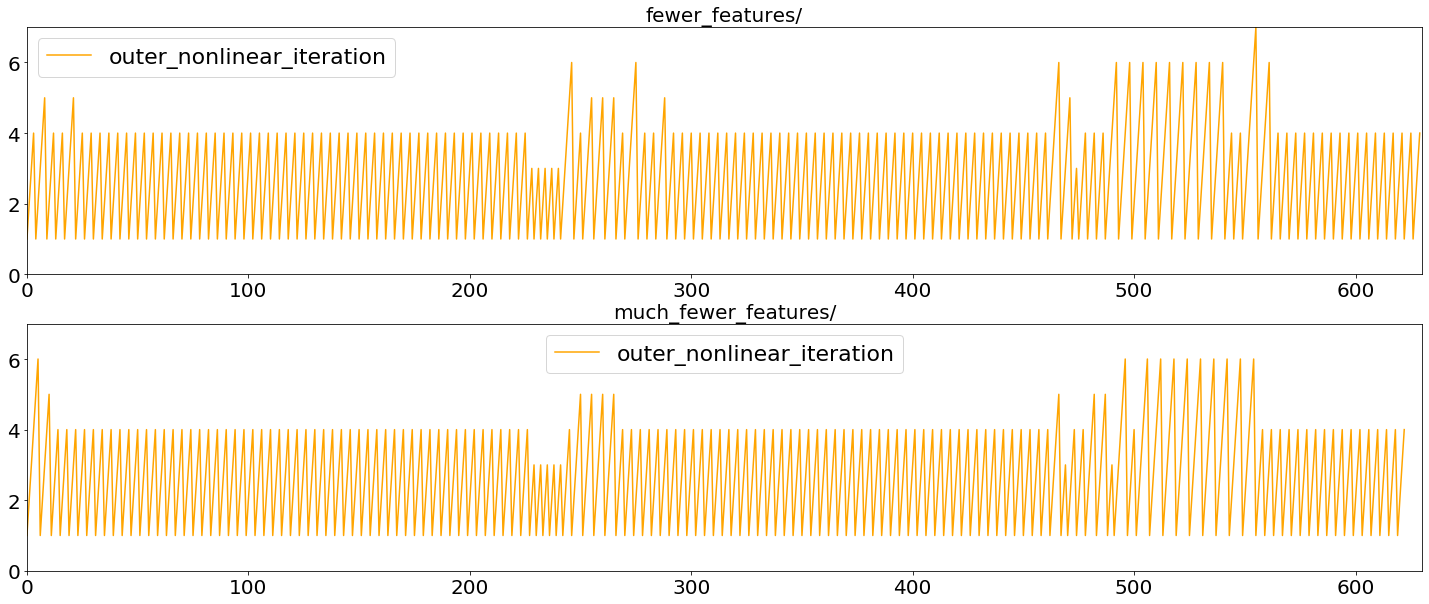

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1)
dfiter[index1].iloc[:,1:2].plot(ax=ax1, style='orange', figsize=(25, 10), fontsize=20, title = dirnames[index1],
                                xlim=[0,max(dfiter[index1].iloc[:,1].count(), dfiter[index2].iloc[:,1].count())],
                                ylim=[0,max(dfiter[index1].iloc[:,1].max(), dfiter[index2].iloc[:,1].max())])
dfiter[index2].iloc[:,1:2].plot(ax=ax2, style='orange', figsize=(25, 10), fontsize=20, title = dirnames[index2],
                                xlim=[0,max(dfiter[index1].iloc[:,1].count(), dfiter[index2].iloc[:,1].count())],
                                ylim=[0,max(dfiter[index1].iloc[:,1].max(), dfiter[index2].iloc[:,1].max())])
ax1.title.set_size(20)
ax2.title.set_size(20)

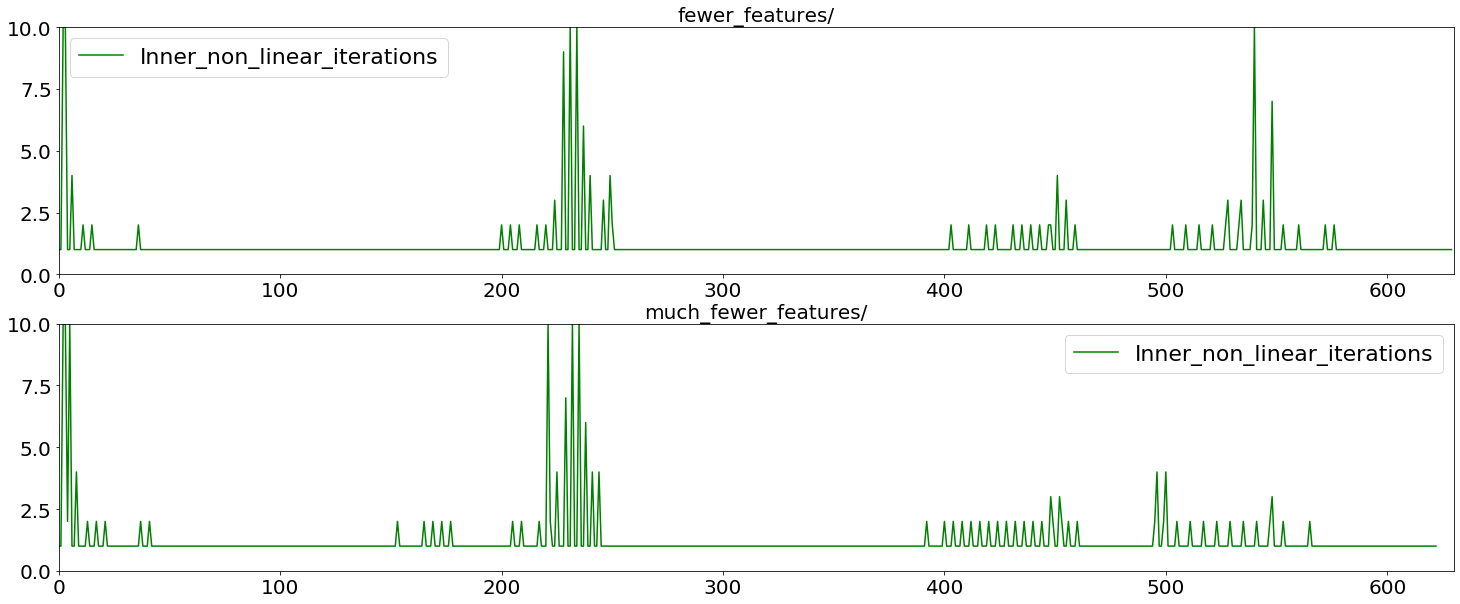

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1)
dfiter[index1].iloc[:,2:].plot(ax=ax1, style='g', figsize=(25, 10), fontsize=20, title = dirnames[index1],
                               xlim=[0,max(dfiter[index1].iloc[:,2].count(), dfiter[index2].iloc[:,2].count())],
                               ylim=[0,max(dfiter[index1].iloc[:,2].max(), dfiter[index2].iloc[:,2].max())])
dfiter[index2].iloc[:,2:].plot(ax=ax2, style='g', figsize=(25, 10), fontsize=20, title = dirnames[index2],
                               xlim=[0,max(dfiter[index1].iloc[:,2].count(), dfiter[index2].iloc[:,2].count())],
                               ylim=[0,max(dfiter[index1].iloc[:,2].max(), dfiter[index2].iloc[:,2].max())])
ax1.title.set_size(20)
ax2.title.set_size(20)

## Plots

In [45]:
onli = []
inli = []
eqnli = []
for i in range(len(dirnames)):
    onli.append(dfiter[i].groupby(['time_step'])['outer_nonlinear_iteration'].count() )
    inli.append(dfiter[i].groupby(['time_step'])['Inner_non_linear_iterations'].sum() )
    eqnli.append(onli[-1] + inli[-1]/3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


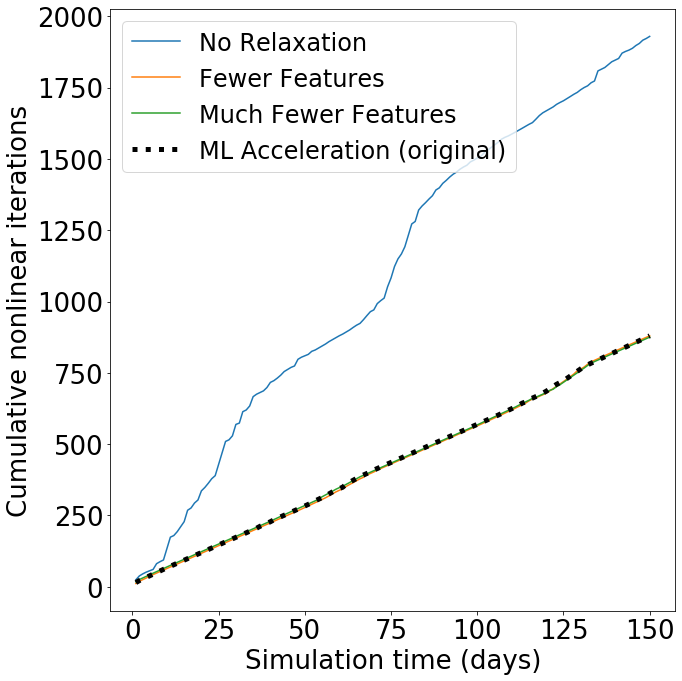

In [46]:
mpl.rcParams.update({'font.size': 24})
mpl.rc('xtick', labelsize=26) 
mpl.rc('ytick', labelsize=26) 
mpl.rc('axes', labelsize=26)

plotlist = [0, 1, 2]
markers= ['o', 'v', 'd', '*', '<', 's', '1', '2']

plt.figure(figsize=(10,10))
for j, i in enumerate(plotlist):
    plt.plot(eqnli[i].index, eqnli[i].cumsum())#, marker=markers[j], markevery=(-1,-3), markersize = 6) #, fillstyle='none'
plt.plot(eqnli[-1].index, eqnli[-1].cumsum(), 'k:', linewidth=5)#

plt.xlabel('Simulation time (days)')
plt.ylabel('Cumulative nonlinear iterations')
#plt.legend(np.array(dirnames)[plotlist + [-1]])
plt.legend(['No Relaxation','Fewer Features','Much Fewer Features', 'ML Acceleration (original)'])
plt.tight_layout()
plt.savefig('feature_case2.eps')